# Chapter 5: Differential Equations

In this chapter, we'll cover ordinary and partial differential equations. 

As usual, we start by loading numpy and matplotlib (and this time random):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 4.3 Partial Differential Equations

Next we would like to know how to solve a restricted class of partial differential equations that are first-order in time (and second order in position). The main classical equation is the diffusion equation, first encountered in Chapter 3:
$$\frac{\partial}{\partial t}p(x,t)=D\frac{\partial^2}{\partial x^2}p(x,t),$$
where $p(x,t)$ is the time-dependent probability distribution. The main quantum equation is Schrodinger's equation:
$$i\hbar\frac{\partial}{\partial t}\psi(x,t)=\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]\psi(x,t),$$
where $\psi(x,t)$ is the (complex) probability amplitude; the modulus square of this is the corresponding probability $p(x,t)=|\psi(x,t)|^2$. The $V(x)$ is a (possible) additional potential energy term.

To solve for the evolution of functions $p(x,t)$ or $\psi(x,t)$, we need to both capture its spatial and temporal degrees of freedom. One common strategy is to discretize the spatial degrees of freedom, for example using the finite-difference methods used in the previous assignment. Then the time-dependence is found using various 'integration' methods such as those you have explored extensively in PHYS 381. The simplest of these is Euler's method, which is basically converting the time derivative into a finite difference approximation in time. If the time step is $h$, then the first-order equation
$$\frac{\partial}{\partial t}f(t)=g(t)$$
becomes
$$f(t_{n+1})=f(t_n)+hg(t_n).$$
This is explicit method in that the value of the function at a later time depends explicitly on the value of the function at the earlier time. Its error scales with $h$, so that choosing small $h$ minimizes the error, at the cost of performing many more time steps (on which error will also accumulate).

A better explicit approach is to use a higher-order finite-difference method for the time derivative. These are the Runge-Kutta methods, where the time at step $n+1$ depends not only on the value of the function at $t_n$ but also at several times intermediate between $t_n$ and $t_{n+1}$. Roughly, an order-$m$ RK method that makes use of $m$ intermediate time values has an error that scales like $h^m$, much better than Euler's method. The $m$th and $(m+1)$th order RK methods can use the same intermediate time points. This means that it is efficient to compute the function at the next time step using both an $m$th and $(m+1)$th order RK method; comparing the two results allows one to continuously probe for the accuracy of the time propagation. If the accuracy is below some threshold then the time step can be made larger on the next step, and vice versa. In this way the stepsize can be varied adaptively; simple problems can end up being solved using only a small number of times steps.

Because the differential equations are first order in time, their solutions can be found formally. The solution to the diffusion equation is given by
$$p(x,t)=\exp\left\{Dt\left[\frac{\partial^2}{\partial x^2}\right]\right\}p(x,0),$$
and the solution to Schrodinger's equation is given by
$$\psi(x,t)=\exp\left\{-\frac{it}{\hbar}\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]\right\}\psi(x,0).$$
(You might be worried that the formal solution to the diffusion equation seems to make the probabilities blow up. But note that any distribution function, for example a Gaussian, has mostly negative curvature so the solution actually makes the probability tend to zero). If the second derivative is replaced by a finite difference approximation, then the entire argument of either exponential is a function of / operator in $x$. We can then express the argument as a matrix, and use the linear algebra methods, such as those discussed in Chapter 3, to exponentiate the matrix. In this way, the solution can be found numerically for any time without the need for an explicit time evolution.

In the case where there are periodic boundary conditions, it is again useful to employ Fourier methods. The derivative term is diagonal in momentum / $k$ space while the potential term (if it exists) is diagonal in $x$ space. For the diffusion equation, one can solve the system completely in $k$ space:
$$p(x)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nx/L}p(n)=\frac{1}{\sqrt{N}}\sum_k e^{ikx}p(k),$$
where $k=2\pi n/L$. Then 
$$\frac{\partial^2}{\partial x^2}p(x)=-\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i2\pi nx/L}p(n),$$
which gives the equation
$$\frac{\partial}{\partial t}p(n,t)=-D\left(\frac{2\pi n}{L}\right)^2p(n,t),$$
which in turn has the solution
$$p(n,t)=\exp\left[-D\left(\frac{2\pi n}{L}\right)^2t\right]p(n,0).$$
One can solve the above equation, and then Fourier transform back again to obtain $p(x,t)$.

In the potential-free case, the solution to the Schrodinger equation proceeds as above:
$$-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x)=\frac{\hbar^2}{2m}\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i2\pi nx/L}\psi(n),$$
which gives the equation
$$i\hbar\frac{\partial}{\partial t}\psi(n,t)=\frac{\hbar^2}{2m}\left(\frac{2\pi n}{L}\right)^2\psi(n,t),$$
which in turn has the solution
$$\psi(n,t)=\exp\left[-\frac{i}{\hbar}\frac{\hbar^2}{2m}\left(\frac{2\pi n}{L}\right)^2t\right]\psi(n,0).$$
Again, one need only Fourier transform this back to real space to obtain $\psi(x,t)$.
In the presence of a potential, however, the situation is a bit trickier, because the potential energy is a function of position, not momentum. Instead, one can propagate the solution while flipping back and forth between $x$ and $k$ space. This is called the split-step method. The evolution of one time step proceeds as:
$$\psi(x,t+\Delta t)={\mathcal F}^{-1}\left\{\exp\left(-\frac{i}{\hbar}\frac{\hbar^2k^2}{2m}\Delta t\right)\cdot{\mathcal F}\left[\exp\left(-\frac{i}{\hbar}V(x)\Delta t\right)\psi(x,t)\right]\right\},$$
where ${\mathcal F}$ applies the Fourier transform from position to momentum, and ${\mathcal F}^{-1}$ does the opposite. Note that here I made use of the fact that $k=2\pi n/L$.

# 4.4 Assignment 10 Problems (50 points): Solve 1D ODEs

**Problem 1 (15 points):** 

**(a) (10 points)** Write a program to solve the 1D diffusion equation, using the Euler method for the time derivative, and both a three-point and five-point stencil to approximate the second-order spatial derivative. Assume that the initial condition for the probability distribution is $P(x,t=0)\propto e^{-(x-5)^2}$, where $0\leq x\leq 10$ and the system has periodic boundary conditions. You will likely find it easiest to encode the derivative operator as a matrix, as was done in the last assignment. Make a movie to show the evolution as a function of time, for time at least up to 10 in rescaled units. Note that the diffusion constant $D$ depends on both the spatial and temporal mesh. How does the behaviour compare with the evolution of the random walker / Markov chain?

**(b) (5 points)** Does the choice of the temporal mesh (given some spatial mesh) affect the stability of the propagation? If so, how?

**Problem 2 (15 points):** 

**(a) (10 points)** Repeat Problem 1, but now for Schrodinger's equation. The initial condition is now
$\psi(x,t=0)\propto e^{-(x-5)^2/2}$. Please propagate the solution up to a time of at least 5 in rescaled units. Check that the probability is conserved throughout the propagation. How does the behavior compare to that of the diffusion equation? Why do you think it behaves like this?

**(b) (5 points)** How small a timestep is needed to ensure that the propagation is stable over this time interval? How does the value compare with that found in Problem 1?

**Problem 3 (10 points):** Again solve problems 1 and 2 above, but now use fourth-order Runge-Kutta instead of Euler's method. In this case, instead of
$$f(t_{n+1})=f(t_n)+hg(t_n),$$
the propagation over the full timestep $h$ makes use of several intermediate steps as follows. If we define the action of the spatial second derivative on the state at $t_n$ as $M\cdot f(t_n)$, then one fourth-order RK step requires defining
\begin{eqnarray}
k_1 &=& M\cdot f(t_n)\\
k_2 &=& M\cdot\left[f(t_n)+0.5k_1)\right]\\
k_3 &=& M\cdot\left[f(t_n)+0.5k_2)\right]\\
k_4 &=& M\cdot\left[f(t_n)+k_3\right],
\end{eqnarray}
so that the solution at the next time step is then
$$f(t_{n+1}) = f(t_n) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$
This is a simplified formula under the specific case where $M$ itself doesn't depend on time (which is the case here). Check the results for both the three-point and five-point stencils for both the diffusion and Schrodinger equations; does the RK method allow you to use a larger time step than for the Euler method and still obtain convergence?

**Problem 4 (10 points):** Use the Fourier approach to obtain the evolution of both the diffusion and Schrodinger equations. Compare the behavior with that obtained above. 

**Problem 5 (5 points BONUS):** Obtain the evolution of the Schrodinger equation, with the same initial conditions, but now with a potential that looks like another Gaussian:
$$V(x)=e^{-3(x-8)^2}.$$
Comment on the observations.

$$\frac{d^2 V(x)}{d x^2}=\frac{V(x+a)+V(x-a)-2V(x)}{a^2}=\rho(x).$$

**Problem 1 (15 points):** 

**(a) (10 points)** Write a program to solve the 1D diffusion equation, using the Euler method for the time derivative, and both a three-point and five-point stencil to approximate the second-order spatial derivative. Assume that the initial condition for the probability distribution is $P(x,t=0)\propto e^{-(x-5)^2}$, where $0\leq x\leq 10$ and the system has periodic boundary conditions. You will likely find it easiest to encode the derivative operator as a matrix, as was done in the last assignment. Make a movie to show the evolution as a function of time, for time at least up to 10 in rescaled units. Note that the diffusion constant $D$ depends on both the spatial and temporal mesh. How does the behaviour compare with the evolution of the random walker / Markov chain?


## Note that the temporal and spacial mesh dependence of D is factored into Euler's method - h being the temporal mesh, and the stencil's $/a^2$ factor bein spacial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

"""
Initial Diffusion Probability Distribution
Not Normalized, needs to be manually normalized after
"""
def pInitDiff(x):
  expMul = -(x-5)**2
  return np.exp(expMul)

"""
Initial Shrodinger Psi Distribution.
Not normalized, needs to be manually normalized after
"""
def psiInitShrog(x):
  expMul = (-(x-5)**2)/2
  return np.exp(expMul)

"""
Generates the N by N matrix representing the second derrivative.
Three point stencil method
This one with periodic boundary conditions.
"""
def genMat3Stencil(N, a):
  mat = []

  ones = 1/a**2
  twos = -2/a**2

  for i in range(N):
    row = [0]*i + [ones] + [twos] + [ones] + [0]*(N-i)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  lstRowi = len(mat)-1
  mat[fstRowi][-1] = ones
  mat[lstRowi][0] = ones

  return mat

"""
Generates the N by N matrix representing the second derrivative.
Five point stencil method
This one with periodic boundary conditions.
"""
def genMat5Stencil(N, a):
  mat = []

  divFac = 12*a**2

  ones = -1/divFac
  sixteens = 16/divFac
  thirties = -30/divFac
  

  for i in range(N):
    row = [0]*(i-1) + [ones] + [sixteens] + [thirties] + [sixteens] + [ones] + [0]*(N-i-1)
    row = row[1:len(row)-2]
    mat.append(row)
  #Now do something funny to the first and last rows.
  # Make matrix that enforces endpoint conditions??
  fstRowi = 0
  sndRowi = 1
  sndLstRowi = len(mat)-1-1
  lstRowi = len(mat)-1
  mat[fstRowi] = [thirties] + [sixteens] + [ones] + [0]*(N-5) + [ones] + [sixteens]
  mat[lstRowi] = [sixteens] + [ones] + [0]*(N-5) + [ones] + [sixteens] + [thirties]

  mat[sndRowi] = [sixteens] + [thirties] + [sixteens] + [ones] + [0]*(N-5) + [ones]
  mat[sndLstRowi] = [ones] + [0]*(N-5) + [ones] + [sixteens] + [thirties] + [sixteens]
  #Now the other rows.

  return mat

In [3]:
#Matrix sanity check.
genMat5Stencil(21, 1)

[[-2.5,
  1.3333333333333333,
  -0.08333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -0.08333333333333333,
  1.3333333333333333],
 [1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -0.08333333333333333],
 [-0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  -0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  -0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0.08333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  -0.08333333333333333,
  1.3333333333333333,
  -2.5,
  1.3333333333333333,
  -0

In [4]:
#Q1: Diffusion Equation, Euler's Method, Three Point Stencil.

#Normalize, get value a, 

xgrid = 100
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

#print(x)

probT0 = []
for entry in x:
  probT0.append(pInitDiff(entry))
sumProb = sum(probT0)
probT0 = [probT0[i]/sumProb for i in range(len(probT0))]

tgrid = 2700
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

probRes = []
probRes.append(probT0)
for ti in t:
  formerProb = probRes[-1]
  #print(formerProb)
  xSize = len(x)

  stencil3 = genMat3Stencil(xSize, dx)

  gProb = np.dot(stencil3, formerProb)
  gProbH = dt * gProb
  newProb = np.add(formerProb, gProbH)
  #print(newProb)
    
  probRes.append(newProb)

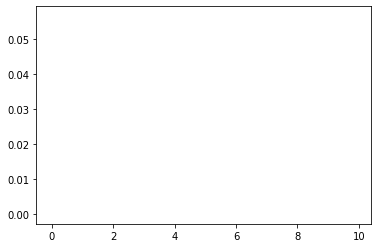

In [5]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 10

ims = []
count = 0
for res in probRes:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

In [6]:
#Q1: Diffusion Equation, Euler's Method, Five-Point Stencil.

#Normalize, get value a, 

xgrid = 100
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

#print(x)

probT0 = []
for entry in x:
  probT0.append(pInitDiff(entry))
sumProb = sum(probT0)
probT0 = [probT0[i]/sumProb for i in range(len(probT0))]

tgrid = 2700
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

probRes = []
probRes.append(probT0)
for ti in t:
  formerProb = probRes[-1]
  #print(formerProb)
  xSize = len(x)

  stencil5 = genMat5Stencil(xSize, dx)

  gProb = np.dot(stencil5, formerProb)
  gProbH = dt * gProb
  newProb = np.add(formerProb, gProbH)
  #print(newProb)
    
  probRes.append(newProb)

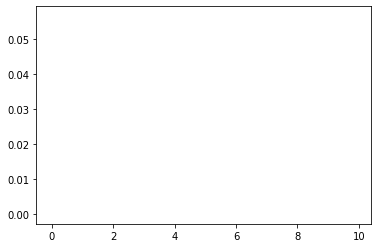

In [7]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 10

ims = []
count = 0
for res in probRes:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### As we can see above, for both choices of stencils, the diffusion equation's solution is such that it begins with a sharp Gaussian peak, and then over time drops and fades down until it converges upon a flat line which represents an even distribution. This is exactly like the random walker/Markov Chain results attained back in... I think it was Chapter 2, where the distribution remains a gaussian that spreads out over time, until the periodic boundary conditions kick in on either end and result in the the distribution converging on a flat, evenly distributed result.In fact, over a long time, it converges to an evenly distributed value for each possible bin, just like with the markov chain results!

#### In fact, notice that it converges to 0.01, which is exactly a probability of 1 distributed across an X that has 100 grid points. This seems reasonable.

**(b) (5 points)** Does the choice of the temporal mesh (given some spatial mesh) affect the stability of the propagation? If so, how?

### Yes. It is difficult to show the results, but in general, below a particular threshold temporal mesh value, it blows up with massive instability, whilst above a particular value - in this case 20/2700 - ended up being highly unstable. Above, the choice of the stencil did not appear to affect stability, with 2700 divisions of 20 seconds time being stable, whilst any hundred below ended up being highly unstable. I speculate that floating point errors play a small part in it, and more importantly, with h bigger than some value, the 'anchoring' provided by the previous value is insufficient to smooth out the instabilities and so it blows up.

**Problem 2 (15 points):** 

**(a) (10 points)** Repeat Problem 1, but now for Schrodinger's equation. The initial condition is now
$\psi(x,t=0)\propto e^{-(x-5)^2/2}$. Please propagate the solution up to a time of at least 5 in rescaled units. Check that the probability is conserved throughout the propagation. How does the behavior compare to that of the diffusion equation? Why do you think it behaves like this?

**(b) (5 points)** How small a timestep is needed to ensure that the propagation is stable over this time interval? How does the value compare with that found in Problem 1?

## Preliminary Theory to Fit it to Look Like the Diffusion Equation

$$i\hbar\frac{\partial}{\partial t}\psi(x,t)=\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]\psi(x,t),$$

Assumption: V(x) = 0 (question doesn't specify)

$$\frac{\partial}{\partial t}\psi(x,t)=\left[i\frac{1}{2}\frac{\hbar}{m}\frac{\partial^2}{\partial x^2}\right]\psi(x,t),$$

Unitless version:

$$\frac{\partial}{\partial t}\psi(x,t)=\left[i\frac{1}{2}\frac{\partial^2}{\partial x^2}\right]\psi(x,t),$$

If diffusion euler was:

$$f(t_{n+1})=f(t_n)+hg(t_n).$$

Shrog Euler is:

$$f(t_{n+1})=f(t_n)+h\frac{i}{2}g(t_n).$$

In [8]:
#Q1: Shrodinger Equation, Euler's Method, 3 Point Stencil

#Normalize, get value a, 

xgrid = 50
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

print(x)

psiT0 = []
for entry in x:
  psiT0.append(psiInitShrog(entry))
sumPsi = sum(psiT0)
psiT0 = [psiT0[i]/sumPsi for i in range(len(psiT0))]

tgrid = 10000
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

psiRes = []
psiRes.append(psiT0)
for ti in t:
  formerPsi = psiRes[-1]
  xSize = len(x)

  stencil3 = genMat3Stencil(xSize, dx)

  gPsi = np.dot(stencil3, formerPsi)
  gPsiH = dt * gPsi * (1j/2)
  newPsi = np.add(formerPsi, gPsiH)
    
  psiRes.append(newPsi)

probRes = []
for entry in psiRes:
  conjug = np.conj(entry)
  res = entry * conjug
  
  #Normalize the result
  sumRes = np.sum(res)
  res = res/sumRes 

  probRes.append(res)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8]


C:\Users\Orko\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


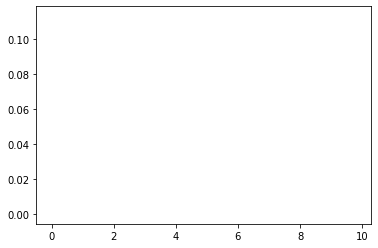

In [9]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 100

ims = []
count = 0
for res in probRes:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

In [10]:
#Q1: Shrog Equation, Euler's Method, 5 Point Stencil

#Normalize, get value a, 

xgrid = 50
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

print(x)

psiT0 = []
for entry in x:
  psiT0.append(psiInitShrog(entry))

#Normalize psi again.
sumPsi = sum(psiT0)
psiT0 = [psiT0[i]/sumPsi for i in range(len(psiT0))]

tgrid = 18000
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

psiRes = []
psiRes.append(psiT0)
for ti in t:
  formerPsi = psiRes[-1]
  xSize = len(x)

  stencil5 = genMat5Stencil(xSize, dx)

  gPsi = np.dot(stencil5, formerPsi)
  gPsiH = dt * gPsi * (1j/2)
  newPsi = np.add(formerPsi, gPsiH)
    
  psiRes.append(newPsi)

probRes = []
unNormedProbRes = []
for entry in psiRes:
  conjug = np.conj(entry)
  res = entry * conjug

  unNormedProbRes.append(res)
  #Normalize the result
  sumRes = np.sum(res)
  res = res/sumRes 

  probRes.append(res)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8]


In [11]:
for entry in unNormedProbRes:
  print(sum(entry))

0.05641902855635524
(0.056419031820345966+0j)
(0.056419035084338875+0j)
(0.056419038348333984+0j)
(0.0564190416123313+0j)
(0.056419044876330815+0j)
(0.05641904814033256+0j)
(0.056419051404336444+0j)
(0.05641905466834256+0j)
(0.05641905793235088+0j)
(0.056419061196361406+0j)
(0.05641906446037411+0j)
(0.056419067724389024+0j)
(0.056419070988406136+0j)
(0.056419074252425476+0j)
(0.05641907751644697+0j)
(0.05641908078047069+0j)
(0.05641908404449662+0j)
(0.056419087308524726+0j)
(0.05641909057255505+0j)
(0.05641909383658758+0j)
(0.05641909710062229+0j)
(0.056419100364659226+0j)
(0.05641910362869833+0j)
(0.056419106892739664+0j)
(0.056419110156783185+0j)
(0.05641911342082894+0j)
(0.056419116684876834+0j)
(0.05641911994892698+0j)
(0.05641912321297933+0j)
(0.05641912647703386+0j)
(0.05641912974109056+0j)
(0.05641913300514952+0j)
(0.05641913626921065+0j)
(0.05641913953327397+0j)
(0.0564191427973395+0j)
(0.056419146061407244+0j)
(0.05641914932547717+0j)
(0.05641915258954931+0j)
(0.05641915585362

(0.056423629704078826+0j)
(0.05642363297117437+0j)
(0.05642363623827212+0j)
(0.056423639505372075+0j)
(0.056423642772474226+0j)
(0.056423646039578584+0j)
(0.05642364930668517+0j)
(0.056423652573793934+0j)
(0.05642365584090491+0j)
(0.05642365910801814+0j)
(0.056423662375133514+0j)
(0.05642366564225111+0j)
(0.056423668909370915+0j)
(0.056423672176492946+0j)
(0.05642367544361715+0j)
(0.05642367871074358+0j)
(0.056423681977872224+0j)
(0.05642368524500308+0j)
(0.05642368851213612+0j)
(0.056423691779271375+0j)
(0.056423695046408824+0j)
(0.0564236983135485+0j)
(0.05642370158069037+0j)
(0.056423704847834454+0j)
(0.05642370811498075+0j)
(0.05642371138212926+0j)
(0.05642371464927994+0j)
(0.05642371791643286+0j)
(0.056423721183587974+0j)
(0.0564237244507453+0j)
(0.05642372771790484+0j)
(0.056423730985066554+0j)
(0.056423734252230504+0j)
(0.056423737519396645+0j)
(0.056423740786565+0j)
(0.05642374405373557+0j)
(0.056423747320908345+0j)
(0.05642375058808333+0j)
(0.056423753855260515+0j)
(0.05642375

(0.05642715618435301+0j)
(0.05642715945383194+0j)
(0.056427162723313086+0j)
(0.05642716599279644+0j)
(0.05642716926228197+0j)
(0.05642717253176974+0j)
(0.056427175801259735+0j)
(0.05642717907075193+0j)
(0.056427182340246324+0j)
(0.05642718560974293+0j)
(0.05642718887924177+0j)
(0.0564271921487428+0j)
(0.05642719541824605+0j)
(0.05642719868775149+0j)
(0.056427201957259164+0j)
(0.05642720522676905+0j)
(0.05642720849628114+0j)
(0.05642721176579542+0j)
(0.056427215035311964+0j)
(0.056427218304830676+0j)
(0.056427221574351615+0j)
(0.05642722484387477+0j)
(0.056427228113400105+0j)
(0.05642723138292769+0j)
(0.05642723465245746+0j)
(0.05642723792198946+0j)
(0.05642724119152366+0j)
(0.05642724446106008+0j)
(0.05642724773059873+0j)
(0.056427251000139546+0j)
(0.0564272542696826+0j)
(0.056427257539227844+0j)
(0.05642726080877534+0j)
(0.05642726407832503+0j)
(0.056427267347876904+0j)
(0.05642727061743102+0j)
(0.05642727388698734+0j)
(0.05642727715654587+0j)
(0.05642728042610659+0j)
(0.0564272836956

(0.05643016504033147+0j)
(0.056430168311846676+0j)
(0.05643017158336411+0j)
(0.05643017485488373+0j)
(0.0564301781264056+0j)
(0.05643018139792966+0j)
(0.05643018466945596+0j)
(0.05643018794098442+0j)
(0.05643019121251515+0j)
(0.05643019448404809+0j)
(0.05643019775558324+0j)
(0.05643020102712062+0j)
(0.05643020429866017+0j)
(0.05643020757020197+0j)
(0.05643021084174599+0j)
(0.056430214113292215+0j)
(0.05643021738484064+0j)
(0.05643022065639129+0j)
(0.05643022392794416+0j)
(0.05643022719949927+0j)
(0.05643023047105655+0j)
(0.05643023374261607+0j)
(0.056430237014177806+0j)
(0.056430240285741756+0j)
(0.05643024355730795+0j)
(0.05643024682887631+0j)
(0.056430250100446895+0j)
(0.056430253372019706+0j)
(0.05643025664359475+0j)
(0.05643025991517198+0j)
(0.056430263186751456+0j)
(0.05643026645833312+0j)
(0.05643026972991701+0j)
(0.05643027300150311+0j)
(0.05643027627309146+0j)
(0.056430279544681966+0j)
(0.05643028281627471+0j)
(0.05643028608786972+0j)
(0.05643028935946689+0j)
(0.056430292631066

(0.0564334343893494+0j)
(0.056433437663080656+0j)
(0.056433440936814114+0j)
(0.056433444210549785+0j)
(0.056433447484287684+0j)
(0.05643345075802782+0j)
(0.05643345403177016+0j)
(0.056433457305514724+0j)
(0.05643346057926152+0j)
(0.05643346385301052+0j)
(0.05643346712676174+0j)
(0.05643347040051521+0j)
(0.056433473674270866+0j)
(0.056433476948028784+0j)
(0.05643348022178887+0j)
(0.05643348349555123+0j)
(0.0564334867693158+0j)
(0.056433490043082554+0j)
(0.05643349331685157+0j)
(0.05643349659062278+0j)
(0.05643349986439623+0j)
(0.05643350313817192+0j)
(0.056433506411949816+0j)
(0.05643350968572987+0j)
(0.056433512959512225+0j)
(0.05643351623329676+0j)
(0.05643351950708355+0j)
(0.05643352278087251+0j)
(0.056433526054663764+0j)
(0.056433529328457195+0j)
(0.056433532602252846+0j)
(0.056433535876050746+0j)
(0.05643353914985083+0j)
(0.05643354242365315+0j)
(0.056433545697457704+0j)
(0.05643354897126447+0j)
(0.05643355224507344+0j)
(0.05643355551888469+0j)
(0.05643355879269809+0j)
(0.056433562

(0.05643670923145013+0j)
(0.0564367125074069+0j)
(0.05643671578336589+0j)
(0.05643671905932714+0j)
(0.056436722335290616+0j)
(0.0564367256112563+0j)
(0.056436728887224244+0j)
(0.0564367321631944+0j)
(0.056436735439166795+0j)
(0.05643673871514139+0j)
(0.05643674199111825+0j)
(0.05643674526709735+0j)
(0.056436748543078646+0j)
(0.05643675181906219+0j)
(0.05643675509504797+0j)
(0.05643675837103599+0j)
(0.056436761647026226+0j)
(0.0564367649230187+0j)
(0.05643676819901341+0j)
(0.056436771475010326+0j)
(0.056436774751009486+0j)
(0.05643677802701091+0j)
(0.05643678130301451+0j)
(0.05643678457902036+0j)
(0.05643678785502845+0j)
(0.05643679113103879+0j)
(0.05643679440705132+0j)
(0.056436797683066114+0j)
(0.05643680095908312+0j)
(0.05643680423510236+0j)
(0.056436807511123836+0j)
(0.05643681078714754+0j)
(0.05643681406317348+0j)
(0.056436817339201674+0j)
(0.05643682061523206+0j)
(0.0564368238912647+0j)
(0.056436827167299565+0j)
(0.05643683044333666+0j)
(0.05643683371937599+0j)
(0.0564368369954175

(0.05643998302738007+0j)
(0.05643998630557542+0j)
(0.05643998958377307+0j)
(0.05643999286197296+0j)
(0.05643999614017511+0j)
(0.05643999941837951+0j)
(0.05644000269658617+0j)
(0.05644000597479507+0j)
(0.05644000925300624+0j)
(0.05644001253121966+0j)
(0.056440015809435334+0j)
(0.05644001908765328+0j)
(0.05644002236587345+0j)
(0.0564400256440959+0j)
(0.056440028922320605+0j)
(0.05644003220054756+0j)
(0.05644003547877675+0j)
(0.056440038757008225+0j)
(0.056440042035241944+0j)
(0.056440045313477905+0j)
(0.05644004859171614+0j)
(0.056440051869956626+0j)
(0.05644005514819939+0j)
(0.05644005842644438+0j)
(0.05644006170469164+0j)
(0.05644006498294114+0j)
(0.056440068261192904+0j)
(0.05644007153944692+0j)
(0.05644007481770319+0j)
(0.05644007809596173+0j)
(0.05644008137422253+0j)
(0.05644008465248559+0j)
(0.05644008793075088+0j)
(0.05644009120901844+0j)
(0.05644009448728824+0j)
(0.05644009776556033+0j)
(0.05644010104383466+0j)
(0.05644010432211121+0j)
(0.056440107600390074+0j)
(0.056440110878671

(0.0564439742775728+0j)
(0.0564439775585636+0j)
(0.056443980839556734+0j)
(0.056443984120552244+0j)
(0.056443987401550114+0j)
(0.05644399068255038+0j)
(0.056443993963552985+0j)
(0.05644399724455796+0j)
(0.05644400052556531+0j)
(0.056444003806575015+0j)
(0.05644400708758711+0j)
(0.05644401036860154+0j)
(0.05644401364961837+0j)
(0.05644401693063753+0j)
(0.0564440202116591+0j)
(0.056444023492683+0j)
(0.0564440267737093+0j)
(0.05644403005473795+0j)
(0.05644403333576898+0j)
(0.05644403661680239+0j)
(0.05644403989783814+0j)
(0.05644404317887628+0j)
(0.05644404645991676+0j)
(0.05644404974095965+0j)
(0.0564440530220049+0j)
(0.0564440563030525+0j)
(0.05644405958410251+0j)
(0.05644406286515487+0j)
(0.05644406614620957+0j)
(0.05644406942726667+0j)
(0.056444072708326146+0j)
(0.056444075989387964+0j)
(0.056444079270452197+0j)
(0.05644408255151878+0j)
(0.05644408583258776+0j)
(0.05644408911365906+0j)
(0.05644409239473279+0j)
(0.05644409567580883+0j)
(0.05644409895688729+0j)
(0.05644410223796811+0j)


(0.05644808730742926+0j)
(0.05644809059164513+0j)
(0.05644809387586393+0j)
(0.05644809716008565+0j)
(0.05644810044431029+0j)
(0.056448103728537875+0j)
(0.05644810701276839+0j)
(0.05644811029700184+0j)
(0.056448113581238246+0j)
(0.056448116865477536+0j)
(0.05644812014971978+0j)
(0.056448123433965+0j)
(0.05644812671821313+0j)
(0.05644813000246421+0j)
(0.05644813328671819+0j)
(0.05644813657097516+0j)
(0.05644813985523505+0j)
(0.0564481431394979+0j)
(0.056448146423763675+0j)
(0.0564481497080324+0j)
(0.056448152992304046+0j)
(0.05644815627657869+0j)
(0.05644815956085626+0j)
(0.05644816284513678+0j)
(0.05644816612942023+0j)
(0.056448169413706666+0j)
(0.05644817269799604+0j)
(0.05644817598228833+0j)
(0.056448179266583604+0j)
(0.05644818255088183+0j)
(0.056448185835183004+0j)
(0.05644818911948718+0j)
(0.05644819240379424+0j)
(0.056448195688104295+0j)
(0.056448198972417325+0j)
(0.056448202256733304+0j)
(0.05644820554105224+0j)
(0.05644820882537414+0j)
(0.056448212109699004+0j)
(0.05644821539402

(0.05645004197281341+0j)
(0.056450045258985705+0j)
(0.05645004854516176+0j)
(0.05645005183134155+0j)
(0.056450055117525134+0j)
(0.05645005840371245+0j)
(0.05645006168990355+0j)
(0.05645006497609839+0j)
(0.056450068262297017+0j)
(0.05645007154849942+0j)
(0.05645007483470559+0j)
(0.05645007812091552+0j)
(0.05645008140712923+0j)
(0.05645008469334672+0j)
(0.05645008797956799+0j)
(0.05645009126579305+0j)
(0.05645009455202189+0j)
(0.05645009783825453+0j)
(0.05645010112449092+0j)
(0.05645010441073114+0j)
(0.05645010769697513+0j)
(0.05645011098322292+0j)
(0.05645011426947451+0j)
(0.056450117555729866+0j)
(0.056450120841989075+0j)
(0.05645012412825205+0j)
(0.05645012741451884+0j)
(0.056450130700789414+0j)
(0.05645013398706386+0j)
(0.05645013727334204+0j)
(0.056450140559624065+0j)
(0.05645014384590993+0j)
(0.05645014713219956+0j)
(0.056450150418493036+0j)
(0.056450153704790354+0j)
(0.05645015699109149+0j)
(0.056450160277396425+0j)
(0.056450163563705205+0j)
(0.05645016685001779+0j)
(0.05645017013

(0.05645310998395286+0j)
(0.05645311327500407+0j)
(0.05645311656606273+0j)
(0.056453119857128864+0j)
(0.05645312314820241+0j)
(0.05645312643928346+0j)
(0.05645312973037201+0j)
(0.05645313302146802+0j)
(0.056453136312571525+0j)
(0.05645313960368251+0j)
(0.05645314289480104+0j)
(0.05645314618592704+0j)
(0.05645314947706058+0j)
(0.05645315276820165+0j)
(0.05645315605935025+0j)
(0.05645315935050639+0j)
(0.056453162641670045+0j)
(0.05645316593284129+0j)
(0.05645316922402009+0j)
(0.05645317251520646+0j)
(0.05645317580640038+0j)
(0.05645317909760192+0j)
(0.05645318238881103+0j)
(0.05645318568002775+0j)
(0.056453188971252045+0j)
(0.05645319226248398+0j)
(0.056453195553723516+0j)
(0.05645319884497067+0j)
(0.05645320213622549+0j)
(0.056453205427487926+0j)
(0.056453208718757995+0j)
(0.05645321201003573+0j)
(0.05645321530132114+0j)
(0.05645321859261421+0j)
(0.05645322188391495+0j)
(0.05645322517522337+0j)
(0.05645322846653947+0j)
(0.0564532317578633+0j)
(0.056453235049194805+0j)
(0.056453238340534

(0.05645634694070581+0j)
(0.056456350244467816+0j)
(0.056456353548251216+0j)
(0.05645635685205603+0j)
(0.05645636015588235+0j)
(0.05645636345973014+0j)
(0.05645636676359943+0j)
(0.05645637006749024+0j)
(0.056456373371402635+0j)
(0.05645637667533661+0j)
(0.0564563799792922+0j)
(0.0564563832832694+0j)
(0.056456386587268294+0j)
(0.05645638989128887+0j)
(0.05645639319533114+0j)
(0.05645639649939517+0j)
(0.05645639980348096+0j)
(0.05645640310758856+0j)
(0.05645640641171796+0j)
(0.056456409715869196+0j)
(0.056456413020042305+0j)
(0.05645641632423731+0j)
(0.056456419628454255+0j)
(0.05645642293269314+0j)
(0.056456426236954016+0j)
(0.05645642954123688+0j)
(0.05645643284554175+0j)
(0.056456436149868686+0j)
(0.05645643945421773+0j)
(0.05645644275858886+0j)
(0.05645644606298212+0j)
(0.05645644936739755+0j)
(0.05645645267183514+0j)
(0.05645645597629497+0j)
(0.05645645928077704+0j)
(0.05645646258528135+0j)
(0.05645646588980798+0j)
(0.05645646919435692+0j)
(0.05645647249892821+0j)
(0.056456475803521

(0.05645955044494508+0j)
(0.0564595537884369+0j)
(0.05645955713200015+0j)
(0.056459560475634905+0j)
(0.05645956381934126+0j)
(0.05645956716311933+0j)
(0.05645957050696919+0j)
(0.056459573850890954+0j)
(0.056459577194884675+0j)
(0.056459580538950505+0j)
(0.05645958388308845+0j)
(0.0564595872272987+0j)
(0.05645959057158128+0j)
(0.0564595939159363+0j)
(0.056459597260363883+0j)
(0.056459600604864095+0j)
(0.05645960394943701+0j)
(0.05645960729408278+0j)
(0.05645961063880142+0j)
(0.05645961398359311+0j)
(0.056459617328457876+0j)
(0.056459620673395855+0j)
(0.056459624018407144+0j)
(0.056459627363491784+0j)
(0.05645963070864991+0j)
(0.05645963405388166+0j)
(0.05645963739918702+0j)
(0.0564596407445662+0j)
(0.056459644090019225+0j)
(0.05645964743554619+0j)
(0.056459650781147216+0j)
(0.0564596541268224+0j)
(0.056459657472571846+0j)
(0.056459660818395596+0j)
(0.056459664164293814+0j)
(0.05645966751026652+0j)
(0.056459670856313905+0j)
(0.056459674202436+0j)
(0.05645967754863293+0j)
(0.0564596808949

(0.05646139983213725+0j)
(0.056461403232805574+0j)
(0.05646140663361995+0j)
(0.05646141003458055+0j)
(0.056461413435687564+0j)
(0.05646141683694123+0j)
(0.05646142023834168+0j)
(0.05646142363988912+0j)
(0.05646142704158376+0j)
(0.056461430443425775+0j)
(0.05646143384541537+0j)
(0.056461437247552766+0j)
(0.056461440649838116+0j)
(0.05646144405227161+0j)
(0.056461447454853486+0j)
(0.056461450857583875+0j)
(0.05646145426046306+0j)
(0.05646145766349114+0j)
(0.0564614610666684+0j)
(0.05646146446999498+0j)
(0.056461467873471054+0j)
(0.05646147127709691+0j)
(0.05646147468087267+0j)
(0.05646147808479855+0j)
(0.05646148148887476+0j)
(0.056461484893101474+0j)
(0.05646148829747891+0j)
(0.05646149170200723+0j)
(0.05646149510668668+0j)
(0.056461498511517445+0j)
(0.05646150191649971+0j)
(0.05646150532163368+0j)
(0.05646150872691956+0j)
(0.05646151213235755+0j)
(0.05646151553794782+0j)
(0.05646151894369064+0j)
(0.056461522349586145+0j)
(0.05646152575563455+0j)
(0.05646152916183607+0j)
(0.056461532568

(0.05646492696372823+0j)
(0.056464930669032+0j)
(0.05646493437488583+0j)
(0.05646493808129043+0j)
(0.056464941788246514+0j)
(0.05646494549575484+0j)
(0.05646494920381611+0j)
(0.05646495291243113+0j)
(0.056464956621600546+0j)
(0.056464960331325156+0j)
(0.056464964041605656+0j)
(0.05646496775244285+0j)
(0.056464971463837436+0j)
(0.05646497517579014+0j)
(0.056464978888301744+0j)
(0.056464982601372976+0j)
(0.056464986315004594+0j)
(0.05646499002919734+0j)
(0.0564649937439519+0j)
(0.05646499745926911+0j)
(0.0564650011751497+0j)
(0.05646500489159436+0j)
(0.05646500860860393+0j)
(0.05646501232617909+0j)
(0.05646501604432064+0j)
(0.056465019763029305+0j)
(0.056465023482305865+0j)
(0.05646502720215104+0j)
(0.05646503092256564+0j)
(0.05646503464355036+0j)
(0.056465038365106024+0j)
(0.056465042087233325+0j)
(0.05646504580993311+0j)
(0.05646504953320605+0j)
(0.056465053257052984+0j)
(0.05646505698147462+0j)
(0.056465060706471726+0j)
(0.05646506443204511+0j)
(0.05646506815819554+0j)
(0.056465071884

(0.05646996751466912+0j)
(0.05646997278327107+0j)
(0.05646997805451231+0j)
(0.05646998332839632+0j)
(0.05646998860492673+0j)
(0.05646999388410697+0j)
(0.05646999916594069+0j)
(0.05647000445043138+0j)
(0.05647000973758258+0j)
(0.05647001502739788+0j)
(0.05647002031988088+0j)
(0.05647002561503511+0j)
(0.056470030912864136+0j)
(0.05647003621337159+0j)
(0.05647004151656098+0j)
(0.056470046822435935+0j)
(0.05647005213100007+0j)
(0.05647005744225697+0j)
(0.05647006275621026+0j)
(0.05647006807286347+0j)
(0.0564700733922203+0j)
(0.05647007871428436+0j)
(0.056470084039059246+0j)
(0.05647008936654857+0j)
(0.05647009469675599+0j)
(0.056470100029685166+0j)
(0.056470105365339675+0j)
(0.05647011070372326+0j)
(0.05647011604483951+0j)
(0.056470121388692084+0j)
(0.05647012673528466+0j)
(0.056470132084620886+0j)
(0.056470137436704496+0j)
(0.056470142791539064+0j)
(0.05647014814912836+0j)
(0.056470153509476054+0j)
(0.05647015887258583+0j)
(0.05647016423846135+0j)
(0.056470169607106366+0j)
(0.056470174978

(0.05647468528701121+0j)
(0.05647469371608081+0j)
(0.056474702152024055+0j)
(0.056474710594850104+0j)
(0.05647471904456822+0j)
(0.056474727501187615+0j)
(0.05647473596471755+0j)
(0.05647474443516734+0j)
(0.05647475291254621+0j)
(0.05647476139686342+0j)
(0.056474769888128336+0j)
(0.05647477838635025+0j)
(0.056474786891538495+0j)
(0.05647479540370237+0j)
(0.05647480392285128+0j)
(0.05647481244899456+0j)
(0.05647482098214157+0j)
(0.056474829522301755+0j)
(0.056474838069484466+0j)
(0.05647484662369915+0j)
(0.056474855184955236+0j)
(0.05647486375326212+0j)
(0.0564748723286293+0j)
(0.05647488091106622+0j)
(0.05647488950058238+0j)
(0.05647489809718724+0j)
(0.0564749067008903+0j)
(0.05647491531170113+0j)
(0.0564749239296292+0j)
(0.056474932554684096+0j)
(0.056474941186875335+0j)
(0.05647494982621251+0j)
(0.05647495847270519+0j)
(0.05647496712636296+0j)
(0.05647497578719545+0j)
(0.0564749844552123+0j)
(0.05647499313042306+0j)
(0.056475001812837454+0j)
(0.056475010502465096+0j)
(0.05647501919931

(0.05648703820683018+0j)
(0.05648705912342105+0j)
(0.056487080063641594+0j)
(0.056487101027523516+0j)
(0.05648712201509861+0j)
(0.05648714302639865+0j)
(0.05648716406145553+0j)
(0.056487185120301084+0j)
(0.05648720620296728+0j)
(0.056487227309486174+0j)
(0.05648724843988966+0j)
(0.05648726959420987+0j)
(0.056487290772478924+0j)
(0.056487311974728976+0j)
(0.05648733320099219+0j)
(0.05648735445130083+0j)
(0.05648737572568717+0j)
(0.05648739702418355+0j)
(0.056487418346822305+0j)
(0.0564874396936359+0j)
(0.05648746106465674+0j)
(0.05648748245991738+0j)
(0.05648750387945032+0j)
(0.05648752532328815+0j)
(0.0564875467914635+0j)
(0.0564875682840091+0j)
(0.056487589800957604+0j)
(0.0564876113423418+0j)
(0.0564876329081945+0j)
(0.05648765449854856+0j)
(0.05648767611343686+0j)
(0.05648769775289233+0j)
(0.056487719416948+0j)
(0.056487741105636875+0j)
(0.056487762818991996+0j)
(0.056487784557046505+0j)
(0.05648780631983358+0j)
(0.05648782810738643+0j)
(0.056487849919738244+0j)
(0.05648787175692238

(0.05654232457750918+0j)
(0.05654241446156192+0j)
(0.056542504461924686+0j)
(0.05654259457875381+0j)
(0.05654268481220595+0j)
(0.056542775162437844+0j)
(0.05654286562960654+0j)
(0.05654295621386932+0j)
(0.05654304691538353+0j)
(0.05654313773430685+0j)
(0.05654322867079718+0j)
(0.05654331972501255+0j)
(0.056543410897111235+0j)
(0.05654350218725178+0j)
(0.05654359359559288+0j)
(0.05654368512229343+0j)
(0.05654377676751259+0j)
(0.05654386853140976+0j)
(0.05654396041414446+0j)
(0.05654405241587646+0j)
(0.056544144536765824+0j)
(0.0565442367769727+0j)
(0.05654432913665752+0j)
(0.056544421615980986+0j)
(0.056544514215103904+0j)
(0.05654460693418738+0j)
(0.056544699773392715+0j)
(0.056544792732881384+0j)
(0.05654488581281515+0j)
(0.056544979013355964+0j)
(0.056545072334665936+0j)
(0.05654516577690752+0j)
(0.056545259340243306+0j)
(0.056545353024836036+0j)
(0.056545446830848854+0j)
(0.056545540758444965+0j)
(0.056545634807787855+0j)
(0.056545728979041206+0j)
(0.05654582327236898+0j)
(0.0565459

### This is very strange. Probability IS conserved, but unfortunately it's not equal to one. This, however, completely justifies us renormalizing it again.

C:\Users\Orko\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


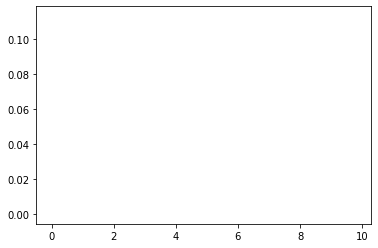

In [12]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 100

ims = []
count = 0
for res in probRes:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### Above, ensuring that probability is conserved is done by nomalizing the calculated probability results at this stage: 
  #Normalize the result

  sumRes = np.sum(res)
  
  res = res/sumRes 

### That action is justified as the probability IS conversed, just that it wasn't at the correct level before.

### Compared to the diffusion equation, the Shrodinger equation also begins as a sharp gaussian that decreases over time, but unlike the diffusion equation, the shodinger equation does not fall smoothly but rather maintains a wavelike pattern going towards the bottom. This is likely due to the imaginary number factor i, which produces circular or wavelike patterns.

**(b) (5 points)** How small a timestep is needed to ensure that the propagation is stable over this time interval? How does the value compare with that found in Problem 1?

### Unlike the prior question, I could not ensure stability even with h = 10/40000 when the size of the x grid was 100. Any more and it took way too long to reasonably calculate. So instead, I turned the x-grid size down to 50, and then found that h needed to be about 10/18000 to be reasonably stable (even then, towards the end, you can see a bit of status fuzz!). This is true of the 5 point stencil, which appears to be much less stable, as the 3-point stencil method was stable even at h = 10/10000, for 50 x points.

**Problem 3 (10 points):** Again solve problems 1 and 2 above, but now use fourth-order Runge-Kutta instead of Euler's method. In this case, instead of
$$f(t_{n+1})=f(t_n)+hg(t_n),$$
the propagation over the full timestep $h$ makes use of several intermediate steps as follows. If we define the action of the spatial second derivative on the state at $t_n$ as $M\cdot f(t_n)$, then one fourth-order RK step requires defining
\begin{eqnarray}
k_1 &=& h*M\cdot f(t_n)\\
k_2 &=& h*M\cdot\left[f(t_n)+0.5k_1)\right]\\
k_3 &=& h*M\cdot\left[f(t_n)+0.5k_2)\right]\\
k_4 &=& h*M\cdot\left[f(t_n)+k_3\right],
\end{eqnarray}
so that the solution at the next time step is then
$$f(t_{n+1}) = f(t_n) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$
This is a simplified formula under the specific case where $M$ itself doesn't depend on time (which is the case here). Check the results for both the three-point and five-point stencils for both the diffusion and Schrodinger equations; does the RK method allow you to use a larger time step than for the Euler method and still obtain convergence?

In [13]:
def f_n_diff(xgrid,xrange):
    '''
    takes the xgrid and xrange to of a desired probability distribution and returns it
    
    '''
    #xgrid = 100
    #xrange = 10
    x = [x*xrange/xgrid for x in range(xgrid)]
    dx = x[1] - x[0]

    #print(x)

    probT0 = []
    for entry in x:
        probT0.append(pInitDiff(entry))
    sumProb = sum(probT0)
    probT0 = [probT0[i]/sumProb for i in range(len(probT0))]


    probT0 = np.array(probT0)
    
    return probT0,np.array(x)
  

def Runge_Kutta(fn,t, M, h):
    
    '''
    provides runge kutta distribution as shown in the latex above
    '''
    
    progression_lst = []
    #fn = probT0
    progression_lst.append(fn)
    #h = 0.01

    #xSize = 100
    #M3 = genMat3Stencil(xSize, dx)


    for ti in range(t):

        k1 = h*np.dot(M,fn)
        k2 = h*np.dot(M,fn + 0.5*k1)
        k3 = h*np.dot(M,fn + 0.5*k2)
        k4 = h*np.dot(M,fn + k3)

        fn = (fn + (1/6)*(k1+ 2*k2 + 2*k3 + k4))/sum(fn)
        #print(fn)
        #print('\ ')

        progression_lst.append(fn)

    progression_lst = np.array(progression_lst)
    progression_lst
    
    return progression_lst
  

In [14]:
#sanity check
xgrid = 100
xrange = 10

f_n_diff(xgrid,xrange)[1][1]-f_n_diff(xgrid,xrange)[1][0]

0.1

In [15]:
xgrid = 100
xrange = 10

dx = f_n_diff(xgrid,xrange)[1][1]-f_n_diff(xgrid,xrange)[1][0]
M3 = np.array(genMat3Stencil(xgrid, dx))
fn = f_n_diff(xgrid,xrange)[0]
#fn

In [16]:
M3

array([[-200.,  100.,    0., ...,    0.,    0.,  100.],
       [ 100., -200.,  100., ...,    0.,    0.,    0.],
       [   0.,  100., -200., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -200.,  100.,    0.],
       [   0.,    0.,    0., ...,  100., -200.,  100.],
       [ 100.,    0.,    0., ...,    0.,  100., -200.]])

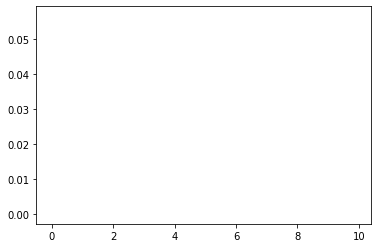

In [17]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 100

ims = []
count = 0

Probs = Runge_Kutta(fn,20000,M3, h = 0.001)

for res in Probs:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(f_n_diff(xgrid,xrange)[1],res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

In [18]:
#5 point stecil
xgrid = 100
xrange = 10

dx = f_n_diff(xgrid,xrange)[1][1]-f_n_diff(xgrid,xrange)[1][0]
M5 = np.array(genMat5Stencil(xgrid, dx))
fn = f_n_diff(xgrid,xrange)[0]

In [19]:
M5

array([[-250.        ,  133.33333333,   -8.33333333, ...,    0.        ,
          -8.33333333,  133.33333333],
       [ 133.33333333, -250.        ,  133.33333333, ...,    0.        ,
           0.        ,   -8.33333333],
       [  -8.33333333,  133.33333333, -250.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -250.        ,
         133.33333333,   -8.33333333],
       [  -8.33333333,    0.        ,    0.        , ...,  133.33333333,
        -250.        ,  133.33333333],
       [ 133.33333333,   -8.33333333,    0.        , ...,   -8.33333333,
         133.33333333, -250.        ]])

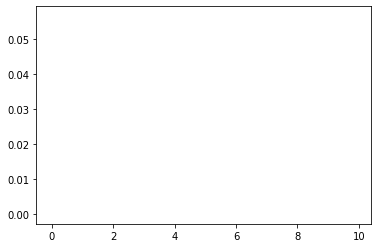

In [20]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 100

ims = []
count = 0
for res in Runge_Kutta(fn,20000,M5, h = 0.001):
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(f_n_diff(xgrid,xrange)[1],res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

**Note the following mathematics for the Psi relation**

#### Firstly lets restate the mathematics for the evolution of the schrodinger wave function: 


$$i\hbar\frac{\partial}{\partial t}\psi(x,t)=\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]\psi(x,t),$$

Assumption: V(x) = 0 (question doesn't specify)

$$\frac{\partial}{\partial t}\psi(x,t)=\left[i\frac{1}{2}\frac{\hbar}{m}\frac{\partial^2}{\partial x^2}\right]\psi(x,t),$$

Unitless version:

$$\frac{\partial}{\partial t}\psi(x,t)=\left[i\frac{1}{2}\frac{\partial^2}{\partial x^2}\right]\psi(x,t),$$

If diffusion euler was:

$$f(t_{n+1})=f(t_n)+hg(t_n).$$

Shrog Euler is:

$$f(t_{n+1})=f(t_n)+h\frac{i}{2}g(t_n).$$

#### Translating this mathematical formulae to runge-kutta

$$f(t_{n+1})=f(t_n)+hg(t_n),$$

\begin{eqnarray}
k_1 &=& h*M\cdot f(t_n)\\
k_2 &=& h*M\cdot\left[f(t_n)+0.5k_1)\right]\\
k_3 &=& h*M\cdot\left[f(t_n)+0.5k_2)\right]\\
k_4 &=& h*M\cdot\left[f(t_n)+k_3\right],
\end{eqnarray}
so that the solution at the next time step is then
$$f(t_{n+1}) = f(t_n) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$

The Schrodinger evolution function becomes:

$$f(t_{n+1}) = f(t_n) + \frac{i}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$


Since this will have a complex component the relation, probability will be plotted which is defined by $p(x,t)=|\psi(x,t)|^2$



In [21]:
#psi functions

def f_n_psi(xgrid,xrange):
    
    '''
    gives the psi distribution instead of probability
    '''
    
    #xgrid = 100
    #xrange = 10
    x = [x*xrange/xgrid for x in range(xgrid)]
    dx = x[1] - x[0]

    #print(x)

    probT0 = []
    for entry in x:
        probT0.append(psiInitShrog(entry))
    sumProb = sum(probT0)
    probT0 = [probT0[i]/sumProb for i in range(len(probT0))]


    psiT0 = np.array(probT0)
    
    return psiT0,np.array(x)
  

def Runge_Kutta_psi(fn,t, M, h):
    
    '''
    runge kutta but for psi, mathetmatics are in the latex above.
    
    '''
    
    progression_lst = []
    #fn = probT0
    progression_lst.append(fn)
    #h = 0.01

    #xSize = 100
    #M3 = genMat3Stencil(xSize, dx)


    for ti in range(t):

        k1 = h*np.dot(M,fn)
        k2 = h*np.dot(M,fn + 0.5*k1)
        k3 = h*np.dot(M,fn + 0.5*k2)
        k4 = h*np.dot(M,fn + k3)

        fn = (fn + (1j/2)*(k1+ 2*k2 + 2*k3 + k4))
        
        fn_norm = fn/ sum(fn)
        
        #print(fn)
        #print('\ ')

        progression_lst.append(fn_norm)

    progression_lst = np.array(progression_lst)
    progression_lst
    
    return progression_lst


In [22]:
#sanity check
xgrid = 100
xrange = 10

f_n_psi(xgrid,xrange)[1][1]-f_n_psi(xgrid,xrange)[1][0]

0.1

In [23]:
xgrid = 100
xrange = 10

dx = f_n_psi(xgrid,xrange)[1][1]-f_n_psi(xgrid,xrange)[1][0]
M3 = np.array(genMat3Stencil(xgrid, dx))
fn = f_n_psi(xgrid,xrange)[0]

In [24]:
fn

array([1.48672039e-07, 2.43896217e-07, 3.96130141e-07, 6.36982891e-07,
       1.01408580e-06, 1.59837505e-06, 2.49424859e-06, 3.85352193e-06,
       5.89431023e-06, 8.92617095e-06, 1.33830304e-05, 1.98655588e-05,
       2.91947097e-05, 4.24780519e-05, 6.11902288e-05, 8.72683206e-05,
       1.23221989e-04, 1.72256995e-04, 2.38408960e-04, 3.26682097e-04,
       4.43185101e-04, 5.95253591e-04, 7.91545622e-04, 1.04209409e-03,
       1.35829772e-03, 1.75283108e-03, 2.23945434e-03, 2.83270543e-03,
       3.54746136e-03, 4.39836217e-03, 5.39909981e-03, 6.56158532e-03,
       7.89502045e-03, 9.40491325e-03, 1.10920900e-02, 1.29517672e-02,
       1.49727553e-02, 1.71368692e-02, 1.94186169e-02, 2.17852305e-02,
       2.41970866e-02, 2.66085406e-02, 2.89691722e-02, 3.12254116e-02,
       3.33224798e-02, 3.52065533e-02, 3.68270356e-02, 3.81388039e-02,
       3.91042923e-02, 3.96952780e-02, 3.98942514e-02, 3.96952780e-02,
       3.91042923e-02, 3.81388039e-02, 3.68270356e-02, 3.52065533e-02,
      

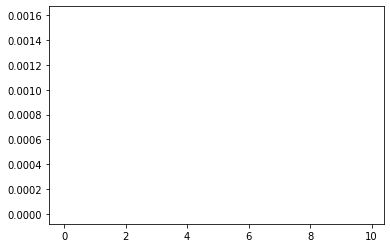

In [25]:
import random
from matplotlib import animation, rc

fig = plt.figure()

#imPerNum = 10

Probabilities_psi = []

for i in Runge_Kutta_psi(fn,200000,M3, h = 0.00001):
    Probabilities_psi.append(np.real(i*np.conj(i)))



ims = []
count = 0
imPerNum = 1000

for res in Probabilities_psi:
    
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(f_n_psi(xgrid,xrange)[1],res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

In [26]:
#5point stecil

xgrid = 100
xrange = 10

dx = f_n_psi(xgrid,xrange)[1][1]-f_n_psi(xgrid,xrange)[1][0]
M5 = np.array(genMat5Stencil(xgrid, dx))
fn = f_n_psi(xgrid,xrange)[0]
M5

array([[-250.        ,  133.33333333,   -8.33333333, ...,    0.        ,
          -8.33333333,  133.33333333],
       [ 133.33333333, -250.        ,  133.33333333, ...,    0.        ,
           0.        ,   -8.33333333],
       [  -8.33333333,  133.33333333, -250.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -250.        ,
         133.33333333,   -8.33333333],
       [  -8.33333333,    0.        ,    0.        , ...,  133.33333333,
        -250.        ,  133.33333333],
       [ 133.33333333,   -8.33333333,    0.        , ...,   -8.33333333,
         133.33333333, -250.        ]])

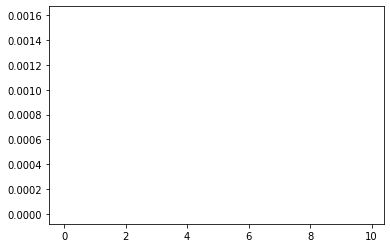

In [27]:
import random
from matplotlib import animation, rc

fig = plt.figure()

#imPerNum = 10

Probabilities_psi = []

for i in Runge_Kutta_psi(fn,100000,M5, h = 0.00001):
    Probabilities_psi.append(np.real(i*np.conj(i)))



ims = []
count = 0
imPerNum = 1000

for res in Probabilities_psi:
    
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(f_n_psi(xgrid,xrange)[1],res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

## Discussion for No.3

As can be seen the kutta method worked fine for the simulation of the diffusion function, and the psi function, however due to the nature of machine simulations there was a build up of floating point errors intitially, which causes instability. To fight this instability, the function was normalized, however for the psi function eventually the normaliztion was overpowered and the instability returned. In order to further combat this, the h step was decreased which increased the stability of the function however, if the function is run long enough, it eventually crashes as well, due to instabilities.

Dr.Feder said not to worry about it and this should be fine.

**Problem 4 (10 points):** Use the Fourier approach to obtain the evolution of both the diffusion and Schrodinger equations. Compare the behavior with that obtained above. 

In the case where there are periodic boundary conditions, it is again useful to employ Fourier methods. The derivative term is diagonal in momentum / $k$ space while the potential term (if it exists) is diagonal in $x$ space. For the diffusion equation, one can solve the system completely in $k$ space:
$$p(x)=\frac{1}{\sqrt{N}}\sum_n e^{i2\pi nx/L}p(n)=\frac{1}{\sqrt{N}}\sum_k e^{ikx}p(k),$$
where $k=2\pi n/L$. Then 
$$\frac{\partial^2}{\partial x^2}p(x)=-\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i2\pi nx/L}p(n),$$
which gives the equation
$$\frac{\partial}{\partial t}p(n,t)=-D\left(\frac{2\pi n}{L}\right)^2p(n,t),$$
which in turn has the solution
$$p(n,t)=\exp\left[-D\left(\frac{2\pi n}{L}\right)^2t\right]p(n,0).$$
One can solve the above equation, and then Fourier transform back again to obtain $p(x,t)$.

In the potential-free case, the solution to the Schrodinger equation proceeds as above:
$$-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x)=\frac{\hbar^2}{2m}\frac{1}{\sqrt{N}}\sum_n\left(\frac{2\pi n}{L}\right)^2e^{i2\pi nx/L}\psi(n),$$
which gives the equation
$$i\hbar\frac{\partial}{\partial t}\psi(n,t)=\frac{\hbar^2}{2m}\left(\frac{2\pi n}{L}\right)^2\psi(n,t),$$
which in turn has the solution
$$\psi(n,t)=\exp\left[-\frac{i}{\hbar}\frac{\hbar^2}{2m}\left(\frac{2\pi n}{L}\right)^2t\right]\psi(n,0).$$
Again, one need only Fourier transform this back to real space to obtain $\psi(x,t)$.
In the presence of a potential, however, the situation is a bit trickier, because the potential energy is a function of position, not momentum. Instead, one can propagate the solution while flipping back and forth between $x$ and $k$ space. This is called the split-step method. The evolution of one time step proceeds as:
$$\psi(x,t+\Delta t)={\mathcal F}^{-1}\left\{\exp\left(-\frac{i}{\hbar}\frac{\hbar^2k^2}{2m}\Delta t\right)\cdot{\mathcal F}\left[\exp\left(-\frac{i}{\hbar}V(x)\Delta t\right)\psi(x,t)\right]\right\},$$
where ${\mathcal F}$ applies the Fourier transform from position to momentum, and ${\mathcal F}^{-1}$ does the opposite. Note that here I made use of the fact that $k=2\pi n/L$.

In [28]:
#Check probability for diffusion, sum = 1? Big bug, spend some time figuring out.
#Rescale units if you can.

"""
The factor in the exponential for diffusion.
"""
#D is a^2/2h, h is timestep, a is spacial.
def expFac(n, L, t, dx, dt):
  D = dx**2/(2*dt)
  return (np.pi * 2 * n / L)**2 * (-1) * t * D #Wait, what is D? Is it dx/(dt**2)? Yes.

In [29]:
#Question 4: Diffusion Equation

xgrid = 100
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

#print(x)

probT0 = []
for entry in x:
  probT0.append(pInitDiff(entry))
  
sumProb = sum(probT0)
probT0 = [probT0[i]/sumProb for i in range(len(probT0))]

tgrid = 3000
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

#Fourier Transform the initial Prob at T0
PnT0 = np.fft.fft(probT0)

timeEvolutionPn = []
for ti in t:
  PnTi = []
  for n in range(len(PnT0)):
    expVal = np.exp(expFac(n, xrange, ti, dx, dt)) #IMPORTANT: NOTE NUMPY'S FFT GOES FROM -N/2 TO N/2. BUT FOR SOME REASON, THAT DOESN'T WORK. HUH?
    newVal = PnT0[n] * expVal
    #print(expVal)
    PnTi.append(newVal)
  timeEvolutionPn.append(PnTi)

#Final results
timeEvoActual = []
for entry in timeEvolutionPn:
  iFFTRes = np.fft.ifft(entry)
  #normedRes = iFFTRes / sum(iFFTRes)
  timeEvoActual.append(iFFTRes)

### So, I had a deep, deep bug in which probability was NOT conserved. At first, it produced a graph that behaved nearly like the diffusion equation was supposed to behave, but had static edges, and then fell down to zero as probability converged on nothing at all. After factoring in that Numpy's own FFT did not go from 0 to N-1, but rather from -N/2 to N/2, I got a new graph where the edges did grow once the peak fell enough, and this is my current result. However, now it immediately drops to an average of zero the moment t is greater than 0, so that's weird. It behaves correctly except for the discontinuity when t goes from 0 to greater than 0, however.

### I then undid that change from -N/2 to N/2 and... it suddenly worked? What??

In [30]:
print(sum(probT0))

0.9999999999999994


In [31]:
#Probability check
for entry in timeEvoActual:
  print(sum(entry))

(0.9999999999999993-5.585196838722984e-33j)
(0.9999999999999997+3.688997891881929e-17j)
(0.9999999999999997-3.962758940434519e-17j)
(0.9999999999999994+2.8189256484623115e-18j)
(0.9999999999999994+1.7103289270958832e-17j)
(0.9999999999999993-4.472333961502706e-17j)
(0.9999999999999994+5.0984607161130846e-17j)
(0.9999999999999997-3.108949729602184e-17j)
(1+1.7265919596831658e-17j)
(0.9999999999999996-8.055622141567298e-17j)
(0.9999999999999996+2.0491421059976034e-17j)
(0.9999999999999997+2.9192143494172207e-17j)
(1.0000000000000002-1.1980434005964824e-17j)
(0.9999999999999996+7.177418381854039e-17j)
(0.9999999999999993+2.9002408113987244e-18j)
(0.9999999999999996+3.1170812458958252e-18j)
(0.9999999999999992+1.3254371558635292e-17j)
(0.9999999999999994-3.40168431617327e-17j)
(0.9999999999999993+2.268693045925918e-17j)
(1-8.993457020767259e-17j)
(0.9999999999999996-5.537562595969714e-17j)
(0.9999999999999997-1.4880674817363548e-17j)
(0.999999999999999+2.7836890778565326e-17j)
(0.999999999

(0.9999999999999992+3.300040362502754e-18j)
(0.9999999999999998-5.163512846462215e-18j)
(0.9999999999999994+1.4568966692773966e-18j)
(0.9999999999999999-4.038653092508504e-18j)
(0.9999999999999996-7.569086416664428e-18j)
(0.9999999999999993+3.733721231496956e-18j)
(0.9999999999999996-3.0696474008495844e-18j)
(0.9999999999999993+1.2671612890924333e-18j)
(0.9999999999999996-8.307699146670178e-18j)
(0.9999999999999998-8.036648603548802e-18j)
(0.9999999999999994-8.321251673826247e-18j)
(0.9999999999999998+1.8973538018496328e-19j)
(0.9999999999999993+5.488773498207866e-19j)
(0.9999999999999999-5.0889739471038364e-18j)
(0.9999999999999998-4.6485168145316e-18j)
(0.9999999999999996+3.1509625637859973e-18j)
(0.9999999999999996-1.1248597539537109e-18j)
(0.9999999999999996+5.55653613398821e-19j)
(0.9999999999999997-5.027987574901527e-18j)
(0.9999999999999994-5.366800753803247e-18j)
(0.9999999999999996-9.229270993282856e-18j)
(0.9999999999999998+4.431676380034499e-18j)
(0.9999999999999992-5.624298

(0.9999999999999993-8.351744859927401e-19j)
(0.9999999999999992-3.5067164016328034e-19j)
(1.0000000000000002+4.0742284762931846e-19j)
(0.9999999999999996-1.4602848010664138e-18j)
(0.9999999999999996-4.768795493041711e-19j)
(0.9999999999999996-6.801674566452032e-19j)
(0.9999999999999996+3.9217625457874106e-19j)
(0.9999999999999997+2.22769665127881e-19j)
(0.9999999999999998+1.2451384324638215e-19j)
(0.9999999999999994-7.589415207398531e-19j)
(0.9999999999999993-2.676624113323589e-19j)
(0.9999999999999998+8.216219588366713e-20j)
(0.9999999999999992-2.31239994600424e-19j)
(0.9999999999999997-2.515687853345272e-19j)
(0.9999999999999994-2.600391148070702e-19j)
(0.9999999999999998-8.165397611531455e-19j)
(0.9999999999999998-7.572474548453445e-19j)
(1-4.616329562535937e-19j)
(0.9999999999999994-1.4628258999081767e-18j)
(0.999999999999999+4.2859867131067597e-19j)
(0.9999999999999996-3.3881317890172014e-20j)
(0.9999999999999993-4.480804290975249e-19j)
(0.9999999999999994+1.3552527156068805e-19j)

(0.9999999999999994+7.030373462210693e-20j)
(0.9999999999999991-1.8126505071242027e-19j)
(0.9999999999999997-6.522153693858113e-20j)
(0.9999999999999997-1.8888834723770898e-19j)
(0.9999999999999993+8.893845946170154e-21j)
(1-5.899584477626202e-19j)
(0.9999999999999996-1.9439406139486193e-19j)
(0.9999999999999996-4.603624068327122e-19j)
(0.9999999999999992+8.639736061993863e-20j)
(0.9999999999999998-8.046812998915853e-21j)
(0.9999999999999997+6.098637220230962e-20j)
(0.9999999999999994-2.956144985917508e-19j)
(0.9999999999999996+3.4135427774348304e-19j)
(0.9999999999999991+6.183340514956392e-20j)
(0.9999999999999997-1.9524109434211623e-19j)
(1.0000000000000002-2.244637310223896e-19j)
(0.9999999999999998+1.0333801956502464e-19j)
(0.9999999999999994-3.5575383784680614e-19j)
(0.9999999999999997-5.535360310306853e-19j)
(0.9999999999999998-2.625802136488331e-20j)
(0.9999999999999996-2.5029823591364575e-19j)
(0.9999999999999993-1.096907666694319e-19j)
(0.9999999999999992+2.0752307207730358e-1

C:\Users\Orko\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


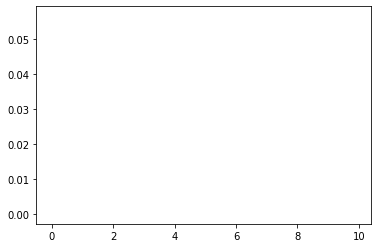

In [32]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 10

ims = []
count = 0
for res in timeEvoActual:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

#### Comment on the behavior above.

### Sure. So, it now works exactly as expected, without fail, for reasons I do not fully understand when it was a horrific buggy mess before. We can see that, beginning with a gaussion probability distribution, it extremely rapidly looses about half its probability and with an associated rise in the edge probabilities, then proceeds to continue to diffuse down until it becomes a flat distribution at 0.01, exactly like how it worked in Question 1. One thing I noticed is that it's faster diffuse down in the beginning, but much slower towards the end. That might be due to how the fourier method works. That it falls to 0.01 makes sense, as the initial probability was 1, and now it's distributed evenly across 100 bins.

$$\psi(n,t)=\exp\left[-\frac{i}{\hbar}\frac{\hbar^2}{2m}\left(\frac{2\pi n}{L}\right)^2t\right]\psi(n,0).$$


In [33]:
"""
The factor in the exponential term.
"""
def expFacShrog(n, L, t):
  return (np.pi * 2 * n / L)**2 * (-1) * 1j/2 * t #Wait, what is D? Is it dx/(dt**2)? Also note the i/2, the Shrodinger Factor

In [34]:
#Question 4: Shrodinger Equation

xgrid = 100
xrange = 10
x = [x*xrange/xgrid for x in range(xgrid)]
dx = x[1] - x[0]

#print(x)

psiT0 = []
for entry in x:
  psiT0.append(psiInitShrog(entry))

#Normalize psi again.
sumPsi = sum(psiT0)
psiT0 = [psiT0[i]/sumPsi for i in range(len(psiT0))]

tgrid = 5000
trange = 10
t = [t*trange/tgrid for t in range(tgrid)]
dt = t[1] - t[0]

#Fourier Transform the initial Prob at T0
PnT0 = np.fft.fft(psiT0)

timeEvolutionPn = []
for ti in t:
  PnTi = []
  for n in range(len(PnT0)):
    expVal = np.exp(expFacShrog(-len(PnT0)/2 + n, xrange, ti)) #IMPORTANT: NUMPY'S FFT GOES FROM -N/2 TO N/2. IN ORDER TO FOLLOW THAT ORDER, I HAVE TO SHIFT OUR EXPONENTIAL VALUE BY THAT MUCH
    newVal = PnT0[n] * expVal
    PnTi.append(newVal)
  timeEvolutionPn.append(PnTi)

timeEvoActual = []
for entry in timeEvolutionPn:
  timeEvoActual.append(np.fft.ifft(entry))

probsActual = []
for psi in timeEvoActual:
  conjug = np.conj(psi)
  res = psi * conjug
  normalizedRes = res/sum(res)
  probsActual.append(normalizedRes)


C:\Users\Orko\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


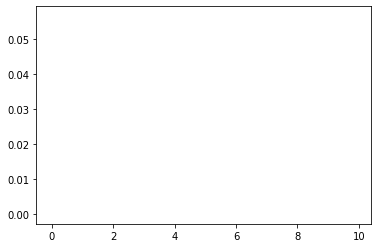

In [35]:
import random
from matplotlib import animation, rc

fig = plt.figure()

imPerNum = 4

ims = []
count = 0
for res in probsActual:
    count = count % imPerNum
    if (count == 0):
        im = plt.plot(x,res,color='black')
        ims.append(im)
    count += 1
ani = animation.ArtistAnimation(fig, ims)

# ani.save('potential0to1.mp4')

rc('animation', html='html5')
ani

### As we can see above, the fourier method for finding the behavior of the Shrodinger equation without any potential and with periodic boundary conditions gives us a bounding repetition of gaussian-like patterns, which is akin to what was attained in Question 2. In Question 2, however, we got what apppears to be the long-time running pattern immediately, whereas here it bounced up and down a few times, then started to turn into mutliple smaller wavy patterns. Overall, the fourier method appears to be very successful for the Shrodinger equation.

### Unlike for the diffusion equation, there was no deep-seated bug which gave an obviously wrong shape or y-axis convergence to. However, here instead, the probabilities were considerably off. After renormalizing the probabilities again, we got the shape at the right size with the right evolution we expected.


**Problem 5 (5 points BONUS):** Obtain the evolution of the Schrodinger equation, with the same initial conditions, but now with a potential that looks like another Gaussian:
$$V(x)=e^{-3(x-8)^2}.$$

proceeds as:
$$\psi(x,t+\Delta t)={\mathcal F}^{-1}\left\{\exp\left(-\frac{i}{\hbar}\frac{\hbar^2k^2}{2m}\Delta t\right)\cdot{\mathcal F}\left[\exp\left(-\frac{i}{\hbar}V(x)\Delta t\right)\psi(x,t)\right]\right\},$$
where ${\mathcal F}$ applies the Fourier transform from position to momentum, and ${\mathcal F}^{-1}$ does the opposite. Note that here I made use of the fact that $k=2\pi n/L$.

$$\psi(x,t+\Delta t)={\mathcal F}^{-1}\left\{\exp\left(-i\frac{k^2}{2}\Delta t\right)\cdot{\mathcal F}\left[\exp\left(-iV(x)\Delta t\right)\psi(x,t)\right]\right\},$$

Comment on the observations.